# Credit Default Analysis

In [1]:
### Download the dataset and the first library

import pandas as pd

In [2]:
data = pd.read_csv('C:/Andre files/Credit Default/archive/Default_Fin.csv')
data

,Index,Employed,Bank Balance,Annual Salary,Defaulted?
0,1,1,8754.36,532339.56,0
1,2,0,9806.16,145273.56,0
2,3,1,12882.60,381205.68,0
3,4,1,6351.00,428453.88,0
4,5,1,9427.92,461562.00,0
...,...,...,...,...,...
9995,9996,1,8538.72,635908.56,0
9996,9997,1,9095.52,235928.64,0
9997,9998,1,10144.92,703633.92,0
9998,9999,1,18828.12,440029.32,0


In [3]:
# 5 columns and 10.000 rows

In [4]:
data.columns

Index(['Index', 'Employed', 'Bank Balance', 'Annual Salary', 'Defaulted?'], dtype='object')

In [5]:
data.describe()

,Index,Employed,Bank Balance,Annual Salary,Defaulted?
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,0.705600,10024.498524,402203.782224,0.033300
std,2886.89568,0.455795,5804.579486,160039.674988,0.179428
min,1.00000,0.000000,0.000000,9263.640000,0.000000
25%,2500.75000,0.000000,5780.790000,256085.520000,0.000000
50%,5000.50000,1.000000,9883.620000,414631.740000,0.000000
75%,7500.25000,1.000000,13995.660000,525692.760000,0.000000
max,10000.00000,1.000000,31851.840000,882650.760000,1.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Index          10000 non-null  int64  
 1   Employed       10000 non-null  int64  
 2   Bank Balance   10000 non-null  float64
 3   Annual Salary  10000 non-null  float64
 4   Defaulted?     10000 non-null  int64  
dtypes: float64(2), int64(3)
memory usage: 390.8 KB


In [7]:
# Finding missing values
data.isna().sum().sort_values(ascending=False) #there are no missing values

Index            0
Employed         0
Bank Balance     0
Annual Salary    0
Defaulted?       0
dtype: int64

## Explanatory Analysis per variable

### Descriptive Stats 

### Employed

In [8]:
data.Employed

0       1
1       0
2       1
3       1
4       1
       ..
9995    1
9996    1
9997    1
9998    1
9999    0
Name: Employed, Length: 10000, dtype: int64

In [9]:
Emp = data.Employed.unique()
len(Emp) # it is a binary variable 

2

In [10]:
# NUmber of employed and Unemployed people 

Emp_= data.Employed.value_counts()
Emp_

1    7056
0    2944
Name: Employed, dtype: int64

<AxesSubplot:>

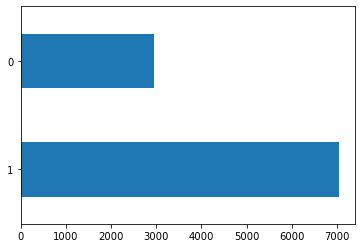

In [11]:
# let's plot this 
Emp_.plot(kind='barh')

In [12]:
Total = 10000
N_Employed = 7056
N_Unemp = 2944

In [13]:
N_Employed / Total * 100

70.56

In [14]:
N_Unemp / Total * 100

29.439999999999998

In [15]:
data_groupby = data.groupby(['Defaulted?','Employed'])['Index'].count()
# - 1 Employed
# - 0 Unemployed

# - 1 Defaulted
# - Not Defaulted
print(data_groupby)

Defaulted?  Employed
0           0           2817
            1           6850
1           0            127
            1            206
Name: Index, dtype: int64


#### 2817 did not default although are classified as unemployed 
#### 6850 did not default and are classified as employed 
#### 206 defaulted although they were classified as employed and 127 defaulted and were classified as unemployed 

#### It is interesting that among those who defaulted the majority are those classified as employed. 

### Bank Balance

In [16]:
data.columns

Index(['Index', 'Employed', 'Bank Balance', 'Annual Salary', 'Defaulted?'], dtype='object')

In [17]:
data['Bank Balance'] #Because of the space 

0        8754.36
1        9806.16
2       12882.60
3        6351.00
4        9427.92
          ...   
9995     8538.72
9996     9095.52
9997    10144.92
9998    18828.12
9999     2411.04
Name: Bank Balance, Length: 10000, dtype: float64

In [18]:
data['Bank Balance'].describe()

count    10000.000000
mean     10024.498524
std       5804.579486
min          0.000000
25%       5780.790000
50%       9883.620000
75%      13995.660000
max      31851.840000
Name: Bank Balance, dtype: float64

In [19]:
# The average account balance for this dataset is 10024 with a std deviation of 5804

In [20]:
# divide the people into high income and low income
high_B_balance = data['Bank Balance'] >= 10025 
low_B_balance = data['Bank Balance'] < 10025

In [21]:
H_Balance = high_B_balance.value_counts()
H_Balance

False    5093
True     4907
Name: Bank Balance, dtype: int64

In [22]:
# 4907 people do have a 'high banl balance' of >= 10025
# 5093 do not

In [23]:
# let's create a new column with theses values = having a balance >= 10025 or < (this will have a binary value)
data['High_or_Low_Balance'] = high_B_balance
print(data['High_or_Low_Balance'])

0       False
1       False
2        True
3       False
4       False
        ...  
9995    False
9996    False
9997     True
9998     True
9999    False
Name: High_or_Low_Balance, Length: 10000, dtype: bool


In [24]:
data.columns

Index(['Index', 'Employed', 'Bank Balance', 'Annual Salary', 'Defaulted?',
       'High_or_Low_Balance'],
      dtype='object')

In [25]:
data

,Index,Employed,Bank Balance,Annual Salary,Defaulted?,High_or_Low_Balance
0,1,1,8754.36,532339.56,0,False
1,2,0,9806.16,145273.56,0,False
2,3,1,12882.60,381205.68,0,True
3,4,1,6351.00,428453.88,0,False
4,5,1,9427.92,461562.00,0,False
...,...,...,...,...,...,...
9995,9996,1,8538.72,635908.56,0,False
9996,9997,1,9095.52,235928.64,0,False
9997,9998,1,10144.92,703633.92,0,True
9998,9999,1,18828.12,440029.32,0,True


In [30]:
data['High_or_Low_Balance'] = data['High_or_Low_Balance'].astype(int)

In [34]:
data['High_or_Low_Balance']

0       0
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: High_or_Low_Balance, Length: 10000, dtype: int32

In [38]:
# Make sure there's no missing values within the dataset. 
data.dropna(axis=1, how='any', thresh=None, subset=None, inplace=False)
print(data)

      Index  Employed  Bank Balance  Annual Salary  Defaulted?  \
0         1         1       8754.36      532339.56           0   
1         2         0       9806.16      145273.56           0   
2         3         1      12882.60      381205.68           0   
3         4         1       6351.00      428453.88           0   
4         5         1       9427.92      461562.00           0   
...     ...       ...           ...            ...         ...   
9995   9996         1       8538.72      635908.56           0   
9996   9997         1       9095.52      235928.64           0   
9997   9998         1      10144.92      703633.92           0   
9998   9999         1      18828.12      440029.32           0   
9999  10000         0       2411.04      202355.40           0   

      High_or_Low_Balance  
0                       0  
1                       0  
2                       1  
3                       0  
4                       0  
...                   ...  
9995       

In [39]:
data_groupby = data.groupby(['Defaulted?','High_or_Low_Balance'])['Index'].count()
print(data_groupby)
# - 0 = low balance (Bank Balance lower than the average of 10025)
# - 1 = High Balance (Bank Balance higher than or equal to the average of 10025)

Defaulted?  High_or_Low_Balance
0           0                      5090
            1                      4577
1           0                         3
            1                       330
Name: Index, dtype: int64


#### 330 defaulted although they had a Bank Balance avobe or equal to the average of 10025 

### 	Annual Salary

In [40]:
data['Annual Salary']

0       532339.56
1       145273.56
2       381205.68
3       428453.88
4       461562.00
          ...    
9995    635908.56
9996    235928.64
9997    703633.92
9998    440029.32
9999    202355.40
Name: Annual Salary, Length: 10000, dtype: float64

In [41]:
data['Annual Salary'].describe()

count     10000.000000
mean     402203.782224
std      160039.674988
min        9263.640000
25%      256085.520000
50%      414631.740000
75%      525692.760000
max      882650.760000
Name: Annual Salary, dtype: float64

In [ ]:
# we can see that the average salary is 402203.  

In [44]:
# divide the people into high income and low income
high_income = data['Annual Salary'] >= 402203 
low_income = data['Annual Salary'] < 402203

In [45]:
High_Income = high_income.value_counts()
High_Income

True     5264
False    4736
Name: Annual Salary, dtype: int64

In [46]:
# let's create a new column with theses values = having a balance >= 402203 or < (this will have a binary value)
data['high_income'] = high_income
print(data['high_income'])

0        True
1       False
2       False
3        True
4        True
        ...  
9995     True
9996    False
9997     True
9998     True
9999    False
Name: high_income, Length: 10000, dtype: bool


In [47]:
data

,Index,Employed,Bank Balance,Annual Salary,Defaulted?,High_or_Low_Balance,high_income
0,1,1,8754.36,532339.56,0,0,True
1,2,0,9806.16,145273.56,0,0,False
2,3,1,12882.60,381205.68,0,1,False
3,4,1,6351.00,428453.88,0,0,True
4,5,1,9427.92,461562.00,0,0,True
...,...,...,...,...,...,...,...
9995,9996,1,8538.72,635908.56,0,0,True
9996,9997,1,9095.52,235928.64,0,0,False
9997,9998,1,10144.92,703633.92,0,1,True
9998,9999,1,18828.12,440029.32,0,1,True


In [49]:
data['high_income'] = data['high_income'].astype(int)
# 1 = True => 402203
# 0 = False < 402203
print(data)

      Index  Employed  Bank Balance  Annual Salary  Defaulted?  \
0         1         1       8754.36      532339.56           0   
1         2         0       9806.16      145273.56           0   
2         3         1      12882.60      381205.68           0   
3         4         1       6351.00      428453.88           0   
4         5         1       9427.92      461562.00           0   
...     ...       ...           ...            ...         ...   
9995   9996         1       8538.72      635908.56           0   
9996   9997         1       9095.52      235928.64           0   
9997   9998         1      10144.92      703633.92           0   
9998   9999         1      18828.12      440029.32           0   
9999  10000         0       2411.04      202355.40           0   

      High_or_Low_Balance  high_income  
0                       0            1  
1                       0            0  
2                       1            0  
3                       0            1  
4 

In [50]:
data_groupby = data.groupby(['Defaulted?','high_income'])['Index'].count()
print(data_groupby)
# - 0 = low income (=> 402203)
# - 1 = High Income (< 402203)

Defaulted?  high_income
0           0              4561
            1              5106
1           0               175
            1               158
Name: Index, dtype: int64


#### 158 of those who defaulted had an annual salary above the average of approx. 402k and 175 below. 

### Defaulted

In [52]:
data['Defaulted?'] 

0       0
1       0
2       0
3       0
4       0
       ..
9995    0
9996    0
9997    0
9998    0
9999    0
Name: Defaulted?, Length: 10000, dtype: int64

In [53]:
# NUmber of employed and Unemployed people 

Def = data['Defaulted?'].value_counts()
Def

0    9667
1     333
Name: Defaulted?, dtype: int64

In [54]:
Total = 10000
Not_Defaulted = 9667
Defaulted = 333

In [55]:
Defaulted / Total *100

3.3300000000000005

<AxesSubplot:>

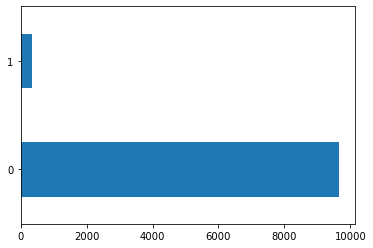

In [56]:
Def.plot(kind='barh')

#### from the total dataset only 3.33% defaulted on theur loans, which is equal to 333 account holders. However, despite the relative
#### low percentage no assumptions can be made as we do not know the granularity of those defaults. 

### Create a Logistic Regression model to predict future credit defaults 

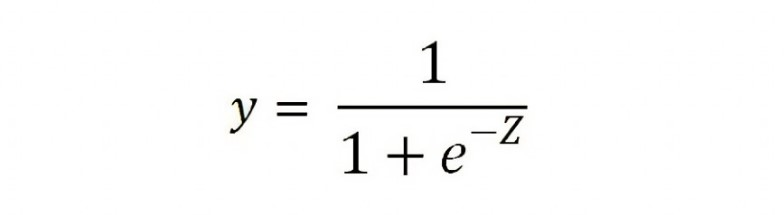

In [57]:
import pylab as pl
import numpy as np
import scipy.optimize as opt
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn import preprocessing

In [58]:
# Initialise the regression model
LR = linear_model.LogisticRegression(solver = 'lbfgs')

In [60]:
data.columns

Index(['Index', 'Employed', 'Bank Balance', 'Annual Salary', 'Defaulted?',
       'High_or_Low_Balance', 'high_income'],
      dtype='object')

In [61]:
X = np.asarray(data[['Employed', 'Bank Balance', 'Annual Salary', 'High_or_Low_Balance', 'high_income']])
X[0:5]

array([[1.0000000e+00, 8.7543600e+03, 5.3233956e+05, 0.0000000e+00,
        1.0000000e+00],
       [0.0000000e+00, 9.8061600e+03, 1.4527356e+05, 0.0000000e+00,
        0.0000000e+00],
       [1.0000000e+00, 1.2882600e+04, 3.8120568e+05, 1.0000000e+00,
        0.0000000e+00],
       [1.0000000e+00, 6.3510000e+03, 4.2845388e+05, 0.0000000e+00,
        1.0000000e+00],
       [1.0000000e+00, 9.4279200e+03, 4.6156200e+05, 0.0000000e+00,
        1.0000000e+00]])

In [62]:
y = np.asarray(data['Defaulted?'])
y[0:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [63]:
# Train the model
LR.fit(X, y)

LogisticRegression()

In [64]:
# Check trained model intercept 
print(LR.intercept_)

# Check trained model coefficients 
print(LR.coef_)

[-9.62633882e-09]
[[ 2.72472133e-09  3.39707493e-05 -1.04904107e-05  4.37071083e-10
   4.89038338e-09]]


#### As we now have the Intercept and the coefficients we can predict our values 

In [65]:
# Make the prediction
Pred = LR.predict(X)

# Generate the table 
pd.crosstab(Pred, data['Defaulted?'])

Defaulted?,0,1
row_0,,
0,9664,333
1,3,0


In [66]:
# Checking the accuracy of the model
LR.score(X, y)

0.9664